In [95]:
import numpy as np
import scipy as sp
import librosa
import sounddevice as sd
import matplotlib.pyplot as plt
import IPython.display as ipd

In [99]:
wav_p_dir = 'C:/Users/ghage/Downloads/audio_samples/colombia/piano/'
wav_f_c4 = 'piano-C4.wav'
wav_f_g3 = 'piano-G3.wav'


In [66]:
a_c4, fs = librosa.load(wav_dir + wav_f_c4)
a_g3, _ = librosa.load(wav_dir + wav_f_g3)

In [67]:
wav_dir = 'C:/Users/ghage/Downloads/audio_samples/colombia/trumpet/'
t_c4 = 'trumpet-c4.wav'
t_g3 = 'trumpet-g3.wav'

In [68]:
at_c4, _ = librosa.load(wav_dir + t_c4)
at_g3, _ = librosa.load(wav_dir + t_g3)

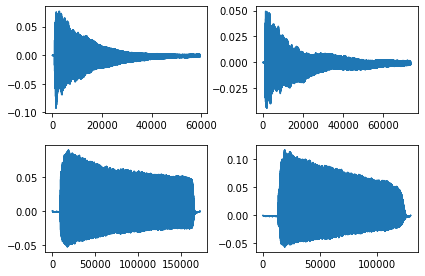

In [70]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2)
plt.tight_layout()
ax11.plot(a_c4)
ax12.plot(a_g3)
ax21.plot(at_c4)
ax22.plot(at_g3)

In [54]:
def plot_sxx(a, fs, ax):
    f, t, sxx = sp.signal.spectrogram(a, fs)
    ax.pcolormesh(t, f, 2*np.where(abs(sxx) == 0, 0, np.log(abs(sxx))), shading='gourand')

<ipython-input-54-655d4f3a9f81>:3: RuntimeWarning: divide by zero encountered in log
  ax.pcolormesh(t, f, 2*np.where(abs(sxx) == 0, 0, np.log(abs(sxx))), shading='gourand')


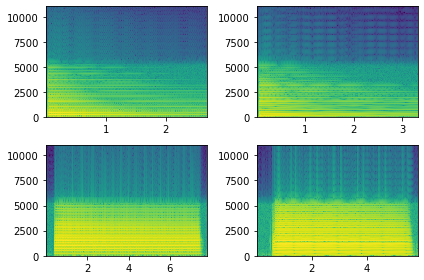

In [74]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2)
plot_sxx(a_c4, fs, ax11)
plot_sxx(a_g3, fs, ax12)
plot_sxx(at_c4, fs, ax21)
plot_sxx(at_g3, fs, ax22)
plt.tight_layout()

In [84]:
_, _, sxx11 = sp.signal.spectrogram(a_c4, fs)
_, _, sxx12 = sp.signal.spectrogram(a_g3, fs)
_, _, sxx21 = sp.signal.spectrogram(at_c4, fs)
_, _, sxx22 = sp.signal.spectrogram(at_g3, fs)
sxx11.shape, sxx12.shape, sxx21.shape, sxx22.shape

((129, 265), (129, 327), (129, 768), (129, 576))

In [87]:
rxy = [np.corrcoef(abs(sxx11[:, 100:201]), abs(s2[:, 100:201])) for s2 in [sxx12, sxx21, sxx22]]

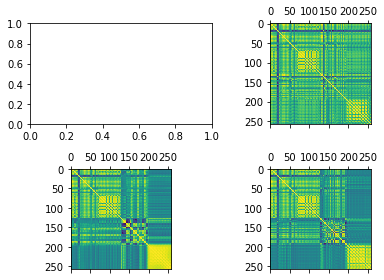

In [93]:
fig, axs = plt.subplots(2, 2)
[axs.flatten()[i+1].matshow(rxy[i]) for i in range(3)]
plt.tight_layout()

In [94]:
[np.sum(rxy[i]) for i in range(3)]

[26281.642521040627, 14258.882121614786, 14373.560723618762]

[(20, 117), (20, 144), (20, 337), (20, 253)]


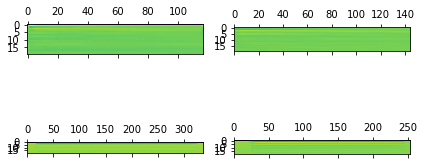

In [119]:
m = [librosa.feature.mfcc(a) for a in [a_c4, a_g3, at_c4, at_g3]]
fig, axs = plt.subplots(2, 2)
[axs.flatten()[i].matshow(m[i]) for i in range(4)]
plt.tight_layout()
print([m[i].shape for i in range(4)])

In [125]:
rmm = [np.corrcoef(m[0][:, 10:101], m[i][:, 10:101]) for i in range(1, 4)]

[35.99196765381239, 68.42767732761922, 56.28522341507366]


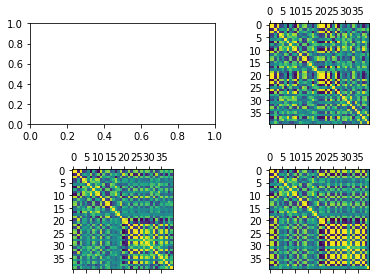

In [127]:
fig, axs = plt.subplots(2, 2)
[axs.flatten()[i+1].matshow(rmm[i]) for i in range(3)]
plt.tight_layout()
print([np.sum(rmm[i]) for i in range(3)])

In [161]:
melt = librosa.feature.melspectrogram(y=at_g3, sr=fs)
melt.shape

(128, 253)

In [162]:
mel = librosa.feature.melspectrogram(y=a_g3, sr=fs)
mel.shape

(128, 144)

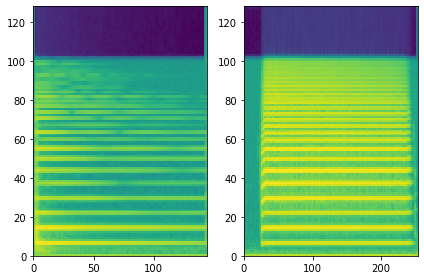

In [164]:
fig, axs = plt.subplots(1,2)
axs[0].pcolormesh(np.log(mel))
axs[1].pcolormesh(np.log(melt))
plt.tight_layout()

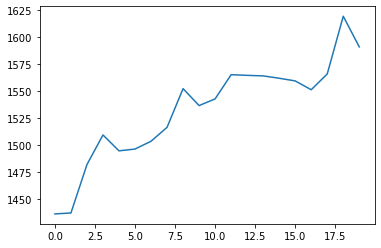

In [160]:
zcr = librosa.feature.spectral_centroid(y=a_c4[10000:20001] + at_g3[40000:50001])
plt.plot(zcr.transpose())

In [1]:
fs

NameError: name 'fs' is not defined